In [1]:
import tensorflow as tf
import os,glob
import cv2
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import matplotlib.pyplot as plt
import pickle
import PIL
from PIL import Image
from math import exp, tanh
from tokenize import Exponent
from enum import Enum
from io import BytesIO, StringIO
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from datetime import date
from io import BytesIO
from IPython import display
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [24]:
DATADIR = "C:/Users/vijeth/FINAL PROJECT BCD Cancer/FNA"

In [25]:
CATEGORIES = ['benign', 'malignant']

In [26]:
import pathlib
data_dir = pathlib.Path(DATADIR)

In [27]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1737


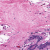

In [28]:
benign = list(data_dir.glob('benign/*'))
PIL.Image.open(str(benign[0]))

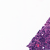

In [29]:
malignant = list(data_dir.glob('malignant/*'))
PIL.Image.open(str(malignant[0]))

In [30]:
batch_size = 32
img_height = 180
img_width = 180

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1737 files belonging to 2 classes.
Using 1390 files for training.


In [32]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1737 files belonging to 2 classes.
Using 347 files for validation.


In [33]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


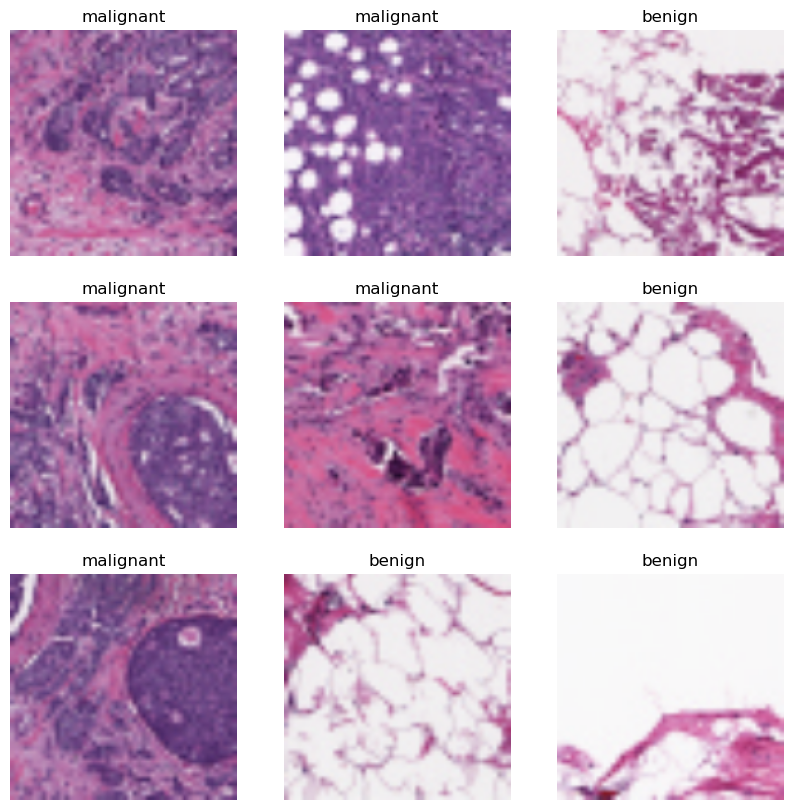

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [35]:
for image_batch, labels_batch in train_ds:
      print(image_batch.shape)
      print(labels_batch.shape)
      break

(32, 180, 180, 3)
(32,)


In [36]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
normalization_layer = layers.Rescaling(1./255)

In [38]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.119486704 0.9060642


In [39]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [42]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
44/44 [==============================] - 16s 323ms/step - loss: 0.4589 - accuracy: 0.7964 - val_loss: 0.3061 - val_accuracy: 0.8905
Epoch 2/10
44/44 [==============================] - 14s 324ms/step - loss: 0.2998 - accuracy: 0.8892 - val_loss: 0.2781 - val_accuracy: 0.9107
Epoch 3/10
44/44 [==============================] - 14s 328ms/step - loss: 0.2728 - accuracy: 0.9029 - val_loss: 0.2761 - val_accuracy: 0.8905
Epoch 4/10
44/44 [==============================] - 14s 320ms/step - loss: 0.2610 - accuracy: 0.8993 - val_loss: 0.2432 - val_accuracy: 0.9251
Epoch 5/10
44/44 [==============================] - 14s 319ms/step - loss: 0.2139 - accuracy: 0.9216 - val_loss: 0.2249 - val_accuracy: 0.9135
Epoch 6/10
44/44 [==============================] - 13s 306ms/step - loss: 0.1875 - accuracy: 0.9309 - val_loss: 0.2131 - val_accuracy: 0.9222
Epoch 7/10
44/44 [==============================] - 14s 324ms/step - loss: 0.1591 - accuracy: 0.9432 - val_loss: 0.2919 - val_accuracy: 0.8703

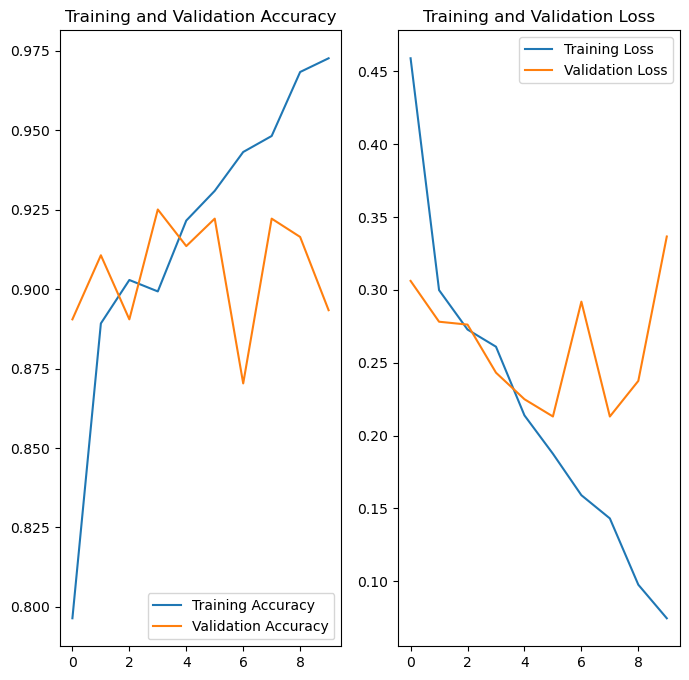

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

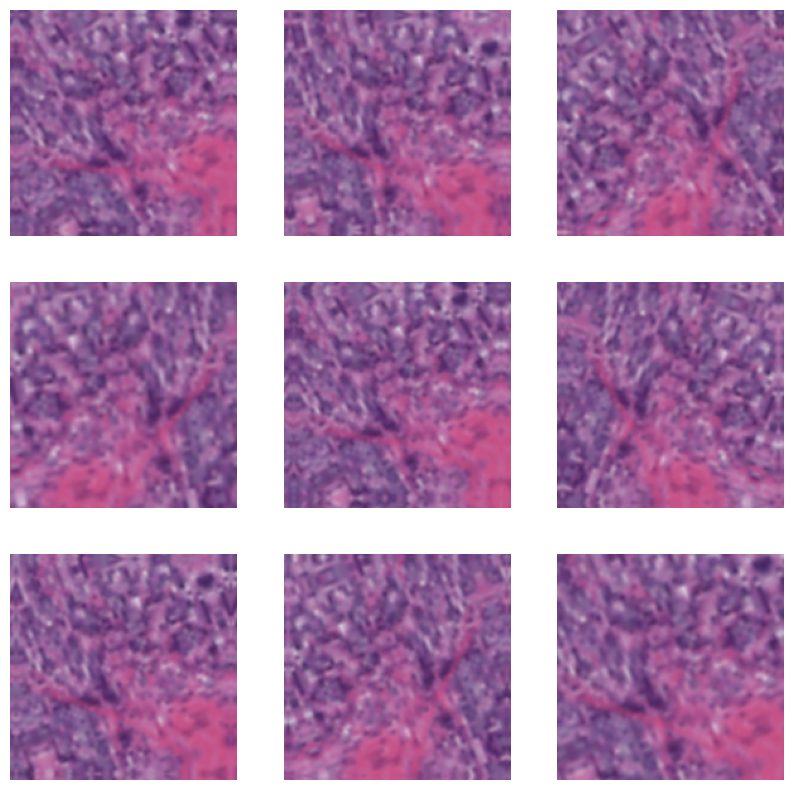

In [45]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [46]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [49]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
44/44 [==============================] - 17s 361ms/step - loss: 0.5987 - accuracy: 0.7540 - val_loss: 0.3746 - val_accuracy: 0.8473
Epoch 2/15
44/44 [==============================] - 15s 350ms/step - loss: 0.3258 - accuracy: 0.8820 - val_loss: 0.2748 - val_accuracy: 0.9193
Epoch 3/15
44/44 [==============================] - 16s 353ms/step - loss: 0.3094 - accuracy: 0.8827 - val_loss: 0.2861 - val_accuracy: 0.9020
Epoch 4/15
44/44 [==============================] - 15s 353ms/step - loss: 0.3029 - accuracy: 0.8885 - val_loss: 0.2551 - val_accuracy: 0.9222
Epoch 5/15
44/44 [==============================] - 16s 362ms/step - loss: 0.2622 - accuracy: 0.9029 - val_loss: 0.2908 - val_accuracy: 0.8934
Epoch 6/15
44/44 [==============================] - 16s 369ms/step - loss: 0.2581 - accuracy: 0.9058 - val_loss: 0.2843 - val_accuracy: 0.8963
Epoch 7/15
44/44 [==============================] - 16s 352ms/step - loss: 0.2733 - accuracy: 0.9094 - val_loss: 0.2579 - val_accuracy: 0.9193

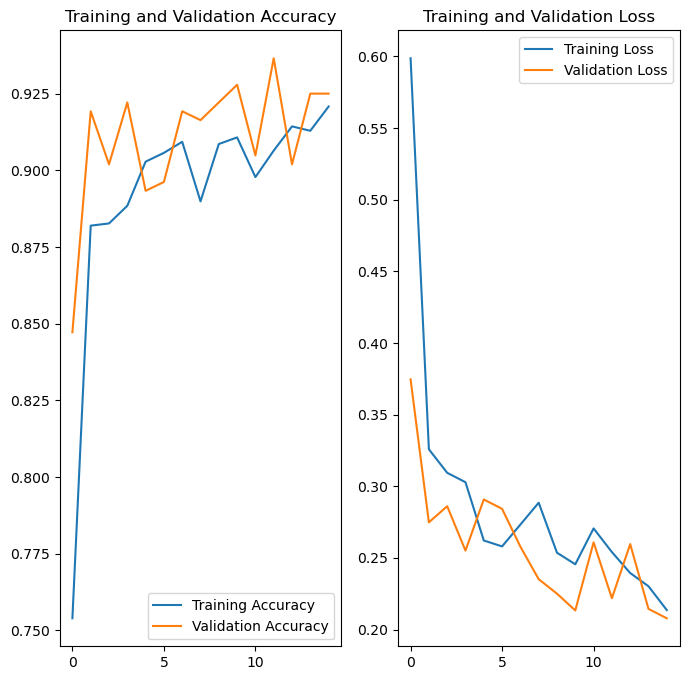

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
DATADIR = "C:/Users/vijeth/FINAL PROJECT BCD Cancer/FNA/benign/10254_idx5_x2251_y751_class0.png"

In [52]:
data_dir = pathlib.Path(DATADIR)

In [53]:
img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 126ms/step
This image most likely belongs to benign with a 96.03 percent confidence.


In [54]:
model.save('C:/Users/vijeth/FINAL PROJECT BCD Cancer/model.h5')


11/11 [==============================] - 1s 82ms/step


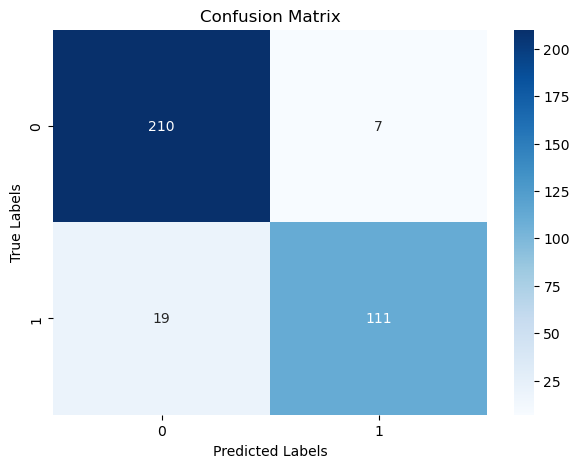

In [58]:
from sklearn.metrics import confusion_matrix

# Make predictions on the validation set
val_predictions = model.predict(val_ds)
val_predictions = np.argmax(val_predictions, axis=1)

# Get the true labels
val_true_labels = []
for _, labels_batch in val_ds:
    val_true_labels.extend(labels_batch.numpy())

# Generate the confusion matrix
cm = confusion_matrix(val_true_labels, val_predictions)

# Display the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
